<a href="https://colab.research.google.com/github/bele99/Project/blob/main/Forecasting_Timeseries_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Fbprophet

In [13]:
!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install holidays==0.10.5
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 66.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61827214 sha256=ee581c6f3e25d066b61c72d120b38ec84438953958556dc270912c85c441b562
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version

In [14]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
#import fbprophet
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df=pd.read_csv('monthly-milk-production-pounds.csv')
df.head()
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [16]:
df.tail()
df.drop(168,axis=0,inplace=True)

<Axes: >

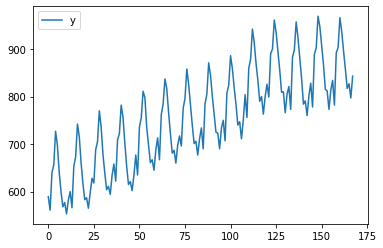

In [17]:
df.columns=["ds","y"]
df.plot()

In [18]:
df['ds']=pd.to_datetime(df['ds'])

<Axes: >

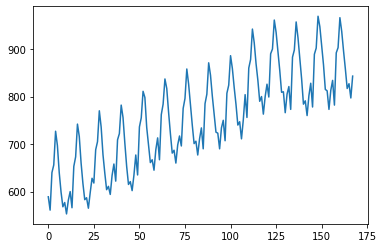

In [19]:
df['y'].plot()

In [20]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [21]:
### intiialize the Model
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [22]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [23]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [24]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)
future_dates.head()
future_dates.tail()

,ds
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29
532,1976-11-30


In [25]:
### Prediction
prediction=model.predict(future_dates)


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [26]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()
print("-----------------------------------")
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

-----------------------------------


,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.432779,803.956214,826.718626
529,1976-11-27,818.581638,807.255519,829.852065
530,1976-11-28,821.905962,810.591429,833.272342
531,1976-11-29,825.344250,814.833959,836.849231
532,1976-11-30,828.827945,817.291048,839.769402


# **Plotting the Forecasts**

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

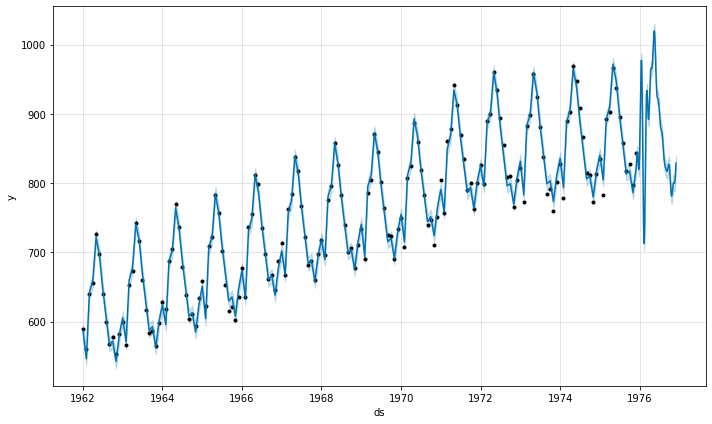

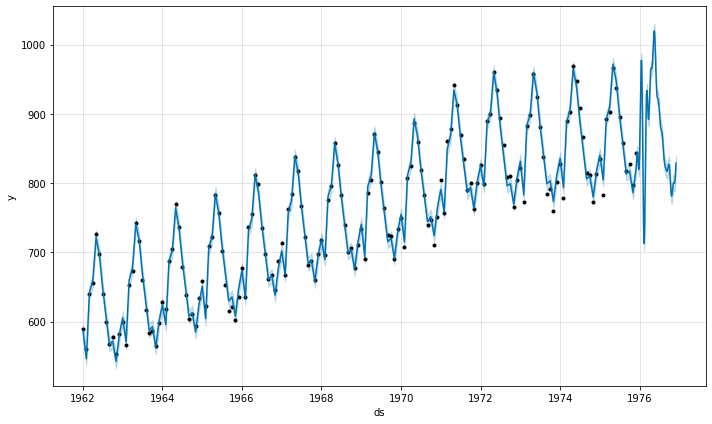

In [27]:
#### plot the predicted projection
model.plot(prediction)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


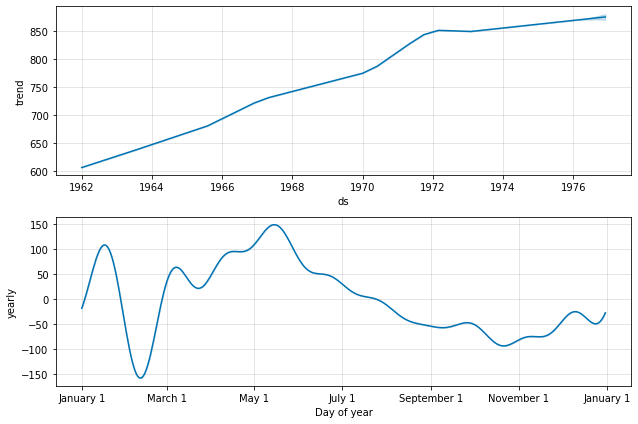

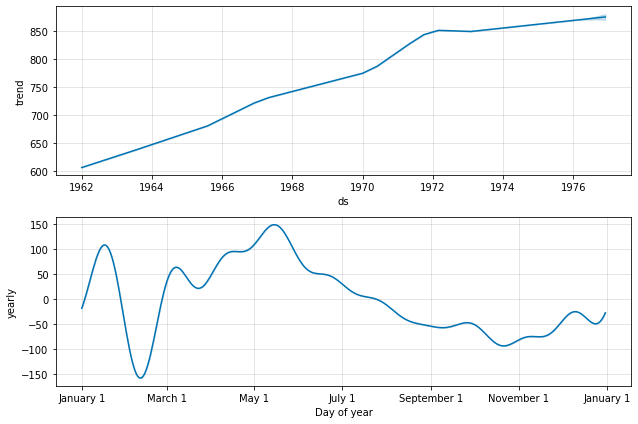

In [28]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)

# **Cross Validation**

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period
3. period the spacing between cutoff dates

In [29]:
df.shape

(168, 2)

In [30]:
from fbprophet.diagnostics import cross_validation

In [31]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9

In [32]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,623.983454,622.146211,625.824762,622.0,1965-01-22
1,1965-03-01,704.907587,698.027046,710.510992,709.0,1965-01-22
2,1965-04-01,718.936151,705.147988,732.146918,722.0,1965-01-22
3,1965-05-01,784.822111,762.503310,806.228031,782.0,1965-01-22
4,1965-06-01,752.443357,720.324502,783.034652,756.0,1965-01-22


# **Obtaining the Performance Metrics**

We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [34]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,250.097382,15.814468,12.155051,0.015567,0.013756,0.36
1,41 days,248.072140,15.750306,12.073011,0.015499,0.013756,0.36
2,42 days,262.453687,16.200422,12.522393,0.016126,0.014017,0.36
3,43 days,264.394618,16.260216,12.773289,0.016525,0.014017,0.36
4,46 days,250.935691,15.840950,12.539619,0.016223,0.014017,0.36


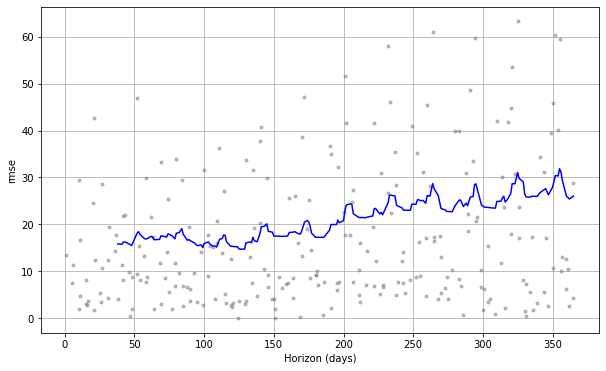

In [35]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')